Load and Explore the Dataset

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Display the first few rows of the dataset
print(titanic.head())

# Get a summary of the dataset
print(titanic.info())

# Get basic statistics
print(titanic.describe())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

EDA: Visualizations
1. Survival Rate by Class

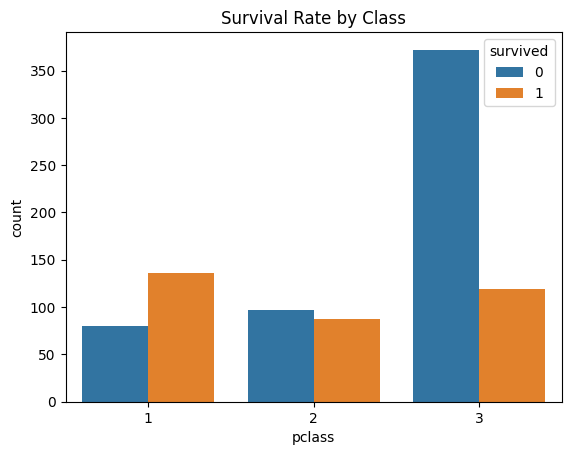

In [4]:
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Survival Rate by Class')
plt.show()


2. Survival Rate by Gender

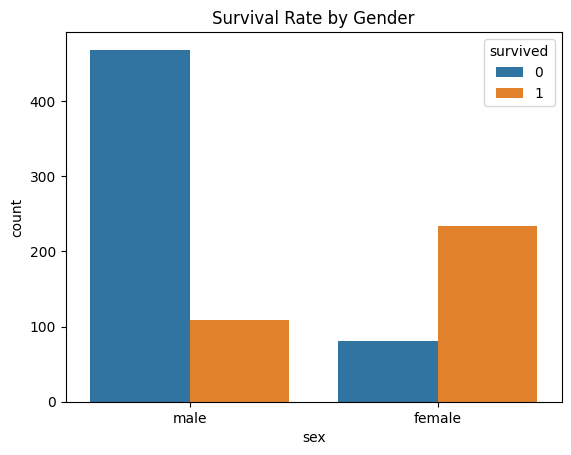

In [5]:
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('Survival Rate by Gender')
plt.show()


3. Age Distribution

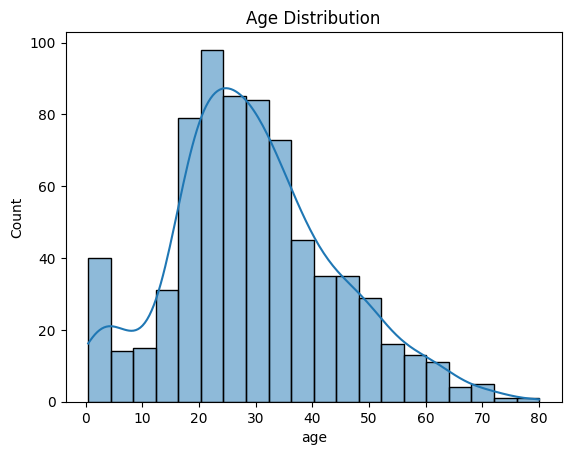

In [6]:
sns.histplot(titanic['age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()


Data Cleaning and Preprocessing

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Select features and target
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'

X = titanic[features]
y = titanic[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = ['age', 'sibsp', 'parch', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_features = ['pclass', 'sex', 'embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


Inference

In [ ]:
# Inference
sample_data = pd.DataFrame({
    'pclass': [3],
    'sex': ['male'],
    'age': [22],
    'sibsp': [1],
    'parch': [0],
    'fare': [7.25],
    'embarked': ['S']
})

# Ensure the columns of sample_data match the order of the training data
sample_data = sample_data[features]

# Use the pipeline to make predictions on the sample data
prediction = pipeline.predict(sample_data)

print(f'Prediction: {prediction[0]} (0 = Not Survived, 1 = Survived)')
